# Merger rate density model comparision

## Introduction

Here is a summary comparing the binary black hole (BBH) merger density distribution between BBH from Population I/II (Pop I/II) stars, BBH from Pop III stars, and primordial black holes (PBHs):

BBH type | Merger rate density distribution | Peak value |
| --- | --- | --- |
Pop I/II stars | Peaks at redshift z ~ 1-2, and declines ever since | $\sim 150–300 Gpc^{-3} yr^{-1}$ |
Pop III stars | Peaks at redshift z ~ 8–16, and declines rapidly at higher redshifts | $\sim 2–30 Gpc^{-3} yr^{-1}$ |
Primordial black holes | Unknown, expected to have a power-law dependence on the age of the Universe | expected to be higher at high redshifts |

* The BBH merger density distribution from Pop I/II stars is well-studied, while the BBH merger density distribution from Pop III stars and PBHs is much less well-studied.

* Astronomers are interested in studying the BBH merger density distribution from Pop III stars and PBHs, as they would provide important information about the early Universe.

* The next generation of gravitational wave observatories, such as the Einstein Telescope and the Cosmic Explorer, are expected to be able to detect BBHs formed from Pop III stars.

## BBH/BNS merger rate at source redshift $z_s$ (in small dz)

* $R(z_s)$: Source frame merger rate density at source redshift $z_s$.

$$ R(z_s) = \frac{\mathcal{R}_m(z_s)}{1+z_s} \frac{dV_c}{dz_s} $$

* $\mathcal{R}_m(z_s)$: detector frame merger rate density at source redshift $z_s$.
* co-moving volume : $\frac{dV_c}{dz_s}$.
* $\frac{1}{1+z_s}$: this factor takes care of the time dilation effect.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# calling necessary class from ler package
from ler.gw_source_population import SourceGalaxyPopulationModel

In [2]:
z_min = 0.0
z_max = 40.0
z = np.geomspace(0.01, 40.0, 500)

## BBH/BNS pop I/II Oguri et al. 2018 model

* LeR default Merger rate follows [WIERDA et al. 2021](https://arxiv.org/pdf/2106.06303.pdf).
* It is a functional fit to the population I/II star merger-rate density normalized to the local merger- rate density following Oguri (2018). 
* This model follows from the M10 model to the Belczynski et al. (2017), which is arrived from Madau & Dickinson (2014) with the inclusion of the metallicity dependence of the star formation rate, which is bassically the effect related to pair-instability supernova (PSN) and  pair-instability pulsation supernova (PPSN). 

\begin{equation}
\mathcal{R}_m(z_s) = \frac{\mathcal{R}_O(b_4+1)e^{b_2 z_s}}{b_4+e^{b_3 z_s}} \text{Gpc}^{-3}\text{yr}^{-1} \tag{1}
\end{equation}
* $z_s$: redshift of source
* $\mathcal{R}$: local mergerrate. $\mathcal{R}=23.9^{+14.3}_{-8.6}\text{Gpc}^{-3}\text{yr}^{-1}=23.9^{+14.3}_{-8.6} \times 10^{-9}\text{Mpc}^{-3}\text{yr}^{-1}$
* fitting parameters: $b_2=1.6$, $b_3=2.1$, $b_4=30$

* with results from [GWTC-3, PDB (pair) model](https://arxiv.org/pdf/2111.03634.pdf):

    | Model | $\mathcal{R}_O$ |
    | :-: | :-: |
    | BNS | $170^{+270}_{-120}$ |
    | BBH | $25^{+10}_{-7}$ |
    | NSBH | $27^{+31}_{-17}$ |


In [3]:
# BBH pop I/II Oguri et al. 2018 model
cbc = SourceGalaxyPopulationModel(
    z_min=z_min,
    z_max=z_max,
    merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018",
    merger_rate_density_param=dict(R0=23.9*1e-9, b2=1.6, b3=2.0, b4=30),
    )

# detector frame
rate1_det = cbc.merger_rate_density(z)

# source frame
rate1_src = cbc.merger_rate_density_src_frame
# normalised to 1
rate1_src = rate1_src(z) / cbc.normalization_pdf_z

In [3]:
# BBH pop I/II Oguri et al. 2018 model
cbc = SourceGalaxyPopulationModel(
    z_min=z_min,
    z_max=z_max,
    merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018",
    merger_rate_density_param=dict(R0=23.9*1e-9, b2=1.6, b3=2.0, b4=30),
    )

z = np.geomspace(0.01, 40.0, 100000)
%time rate1_det = cbc.merger_rate_density(z)

INFO:numba.core.transforms:finding looplift candidates
INFO:numba.core.transforms:finding looplift candidates
CPU times: user 129 ms, sys: 3.36 ms, total: 132 ms
Wall time: 135 ms


In [7]:
%time rate1_det = cbc.merger_rate_density(z)

CPU times: user 2.27 ms, sys: 1.94 ms, total: 4.22 ms
Wall time: 2.33 ms


## Star formation rate

* Madau and Dickinson's 2014 paper, titled ["Cosmic Star-Formation History"](https://www.annualreviews.org/doi/pdf/10.1146/annurev-astro-081811-125615) provides a comprehensive overview of the star formation rate in the universe
* Madau and Dickinson identify a peak in the star formation rate around redshifts of 1 to 2, corresponding to a critical period in the universe's history when galaxies were forming stars at a significantly higher rate.
* Extinction-corrected cosmic star formation rate is given below. Extinction refers to the process by which starlight is absorbed and scattered by dust and gas in galaxies, making it appear fainter and altering the observed spectrum. This is also Eqn. 1 in [Belczynski et al. 2016](https://arxiv.org/pdf/1602.04531.pdf). Also refer to [Belczynski et al. 2017](https://arxiv.org/pdf/1612.01524.pdf) for the metallicity dependence of the star formation rate.

\begin{equation}
\psi(z) = 0.015 \frac{(1+z)^{2.7}}{1+[(1+z)/2.9]^{5.6}} \text{M}_\odot \text{yr}^{-1} \text{Mpc}^{-3} \tag{2}
\end{equation}

In [4]:
# Star formation rate Madau & Dickinson 2014
cbc = SourceGalaxyPopulationModel(
    z_min=z_min,
    z_max=z_max,
    merger_rate_density="star_formation_rate_madau_dickinson2014",
    merger_rate_density_param=dict(af=2.7, bf=5.6, cf=2.9),
    )

# detector frame
rate2_det = cbc.merger_rate_density(z)

# source frame
rate2_src = cbc.merger_rate_density_src_frame
# normalised to 1
rate2_src = rate2_src(z) / cbc.normalization_pdf_z

## BBH pop III model, Ken et al. 2022

* This model is based on the section II B [Ken et al. 2022](https://arxiv.org/pdf/2204.11864.pdf) paper.
* Its a phenomenological model for the volumetric merger rate density of Pop III BBHs.
* This model is a simple fit to the merger rate density predicted from population synthesis studies.

\begin{equation}
\dot{n}_{III} = n_o \frac{e^{a_{III}(z_s-z_{III})}}{a_{III}+b_{III} e^{(a_{III}+b_{III})(z_s-z_{III})}} \text{Mpc}^{-3}\text{yr}^{-1} \tag{3}
\end{equation}

* $z_s$: redshift of source
* $n_o$: Normalization factor. $a_{III}$, $b_{III}$, $z_{III}$ are fitting parameters.
* $n_o=19.2\times 10^{-9}$, $a_{III}=0.66$, $b_{III}=0.3$, $z_{III}=11.6$




In [5]:
# pop III Ken et al. 2022
cbc = SourceGalaxyPopulationModel(
    z_min=z_min,
    z_max=z_max,
    merger_rate_density="merger_rate_density_popIII_ken2022"
    )

# detector frame
rate3_det = cbc.merger_rate_density(z)

# source frame
rate3_src = cbc.merger_rate_density_src_frame
# normalised to 1
rate3_src = rate3_src(z) / cbc.normalization_pdf_z

# Primordial BBH model, Ken et al. 2022

* This model is based on the section II A [Ken et al. 2022](https://arxiv.org/pdf/2204.11864.pdf) paper.
* the volumetric merger rate density of PBHs has a power-law dependence on the age of the Universe $t(z)$ extending up to $z \gtrsim 10^3$.

\begin{equation}
\dot{n}_{PBH} = n_o \left(\frac{t(z)}{t_o}\right)^{-34/37} \text{Mpc}^{-3}\text{yr}^{-1} \tag{4}
\end{equation}

* $z_s$: redshift of source
* $n_o$: Normalization factor. $t_o$ is the present age of the Universe.
* $n_o=0.044\times 10^{-9}$, $t_o=13.786885302009708$

In [6]:
# primordial black holes Ken et al. 2022
cbc = SourceGalaxyPopulationModel(
        z_min=z_min,
        z_max=z_max,
        merger_rate_density="merger_rate_density_primordial_ken2022")

# detector frame
rate4_det = cbc.merger_rate_density(z)

# source frame
rate4_src = cbc.merger_rate_density_src_frame
# normalised to 1
rate4_src = rate4_src(z) / cbc.normalization_pdf_z

## Plots and comparison

### reproduction of Ken et al. 2022 [Fig. 3](https://arxiv.org/pdf/2204.11864.pdf)

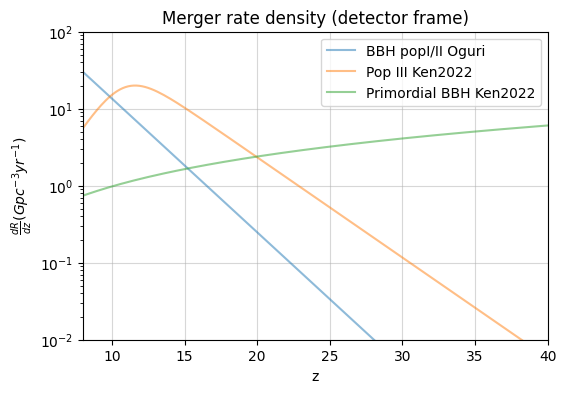

In [13]:
# normalization factor is different
# plot the merger rate density (detector frame)
# factor 1e9 is to convert to Gpc^-3 yr^-1 from Mpc^-3 yr^-1
plt.figure(figsize=(6,4))
plt.plot(z, rate1_det*1e9, color='C0', linestyle='-', alpha=0.5, label="BBH popI/II Oguri")
plt.plot(z, rate3_det*1e9, color='C1', linestyle='-', alpha=0.5, label="Pop III Ken2022")
plt.plot(z, rate4_det*1e9, color='C2', linestyle='-', alpha=0.5, label="Primordial BBH Ken2022")
# labels
plt.xlabel("z")
plt.ylabel(r"$\frac{dR}{dz} (Gpc^{-3} yr^{-1})$")
plt.yscale("log")
plt.xlim(8, 40)
plt.ylim(1e-2, 1e2)
plt.legend()
plt.grid(alpha=0.5)
plt.title("Merger rate density (detector frame)")
plt.show()


### Merger rate density (source frame)

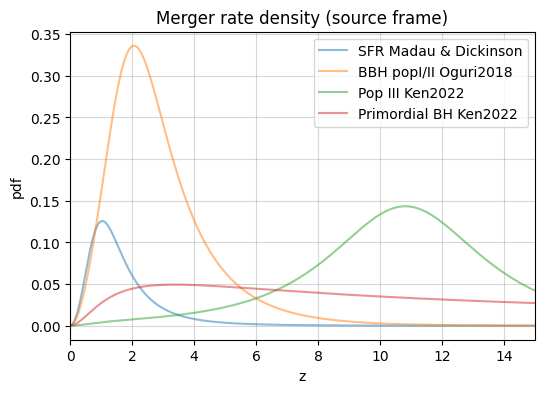

In [44]:
# plot the pdf of zs (source frame)
plt.figure(figsize=(6,4))
plt.plot(z, rate2_src, color='C0', linestyle='-', alpha=0.5, label="SFR Madau & Dickinson")
plt.plot(z, rate1_src, color='C1', linestyle='-', alpha=0.5, label="BBH popI/II Oguri2018")
plt.plot(z, rate3_src, color='C2', linestyle='-', alpha=0.5, label="Pop III Ken2022")
plt.plot(z, rate4_src, color='C3', linestyle='-', alpha=0.5, label="Primordial BH Ken2022")
# labels
plt.xlabel("z")
plt.ylabel(r"pdf")
#plt.yscale("log")
plt.xlim(0, 15)
plt.legend()
plt.grid(alpha=0.5)
plt.title("Merger rate density (source frame)")
plt.show()

## Conclusion

* The merger rate density of binary black hole (BBH) mergers from Population III (Pop. III) stars, primordial black holes (PBHs), and Population I/II (Pop. I/II) stars is a topic of active research. All three models suggest that BBH mergers are a common occurrence in the universe, but there is still a significant range of uncertainty in the merger rate density and mass spectrum of BBH mergers from each channel. Future observations of gravitational waves from merging BBHs will help to constrain these uncertainties and provide valuable insights into the formation and evolution of black holes and binary star systems.

* In particular, Einstein Telescope and Cosmic explorer, next-generation gravitational wave detectors (3G), are expected to detect a significant number of BBH mergers from all three channels. This will provide a wealth of new information about the formation and evolution of black holes and binary star systems.

In [1]:
from ler.gw_source_population import SourceGalaxyPopulationModel
import numpy as np
import matplotlib.pyplot as plt

cbc = SourceGalaxyPopulationModel()
pdf = lambda z: cbc.merger_rate_density_src_frame(z, param=cbc.merger_rate_density_param) / cbc.normalization_pdf_z

In [53]:
from ler.utils import rejection_sample as rs

%time test = rs(pdf, cbc.z_min, cbc.z_max, size=100000)

CPU times: user 45.6 ms, sys: 11.8 ms, total: 57.5 ms
Wall time: 55.8 ms


In [61]:
from scipy.optimize import minimize

%timeit result = minimize(lambda x: -pdf(x), x0=0.0, bounds=[(cbc.z_min, cbc.z_max)])

1.64 ms ± 7.31 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [60]:
result.x
-result.fun

0.33788358306346356

In [57]:
np.max(pdf(np.linspace(cbc.z_min, cbc.z_max, 1000)))

0.3378819407927183

In [67]:
%timeit test = rejection_sample1(pdf, cbc.z_min, cbc.z_max, size=1000000)

364 ms ± 14.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%timeit test = rejection_sample2(pdf, cbc.z_min, cbc.z_max, size=1000000)

431 ms ± 7.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%timeit test = rejection_sample3(pdf, cbc.z_min, cbc.z_max, size=1000000)

379 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%timeit test = rejection_sample4(pdf, cbc.z_min, cbc.z_max, size=1000000)

388 ms ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
%timeit test = rejection_sample5(pdf, cbc.z_min, cbc.z_max, size=1000000)

355 ms ± 6.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%time test = rejection_sample6(pdf, cbc.z_min, cbc.z_max, size=10000)

CPU times: user 3.77 s, sys: 1.91 s, total: 5.69 s
Wall time: 4.16 s


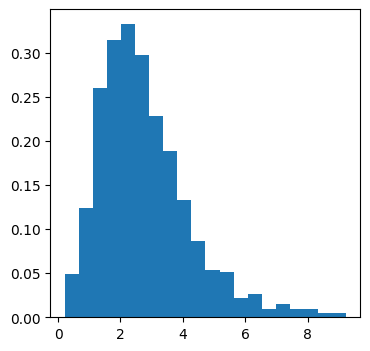

In [75]:
plt.figure(figsize=(4,4))
plt.hist(rejection_sample5(pdf, cbc.z_min, cbc.z_max, size=1000), density=True, bins=20)
plt.show()

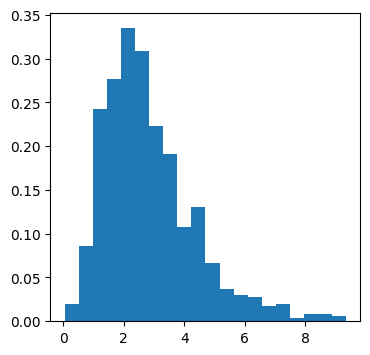

In [76]:
plt.figure(figsize=(4,4))
plt.hist(rejection_sample5(pdf, cbc.z_min, cbc.z_max, size=1000), density=True, bins=20)
plt.show()

In [32]:
def rejection_sample1(pdf, xmin, xmax, size=100, chunk_size=10000):
    """
    Helper function for rejection sampling from a pdf with maximum and minimum arguments.
    Input parameters:
        pdf: the pdf to sample from
        xmin: the minimum argument of the pdf
        xmax: the maximum argument of the pdf
        size: the number of samples to draw
    Output:
        samples: the samples drawn from the pdf
    """
    x = np.linspace(xmin, xmax, 1000)
    y = pdf(x)
    ymax = np.max(y)
    # Rejection sample in chunks
    x_sample = []
    while len(x_sample) < size:
        x_try = np.random.uniform(xmin, xmax, size=chunk_size)
        y_try = np.random.uniform(0, ymax, size=chunk_size)
        ymax = max(ymax, np.max(y_try))  # Update the maximum value of the pdf
        # Add while retaining 1D shape of the list
        x_sample += list(x_try[y_try < pdf(x_try)])
    # Transform the samples to a 1D numpy array
    x_sample = np.array(x_sample).flatten()
    # Return the correct number of samples
    return x_sample[:size]

In [33]:
# slower than rejection_sample1
def rejection_sample2(pdf, xmin, xmax, size=100):
    """
    Helper function for rejection sampling from a pdf with maximum and minimum arguments.
    Input parameters:
        pdf: the pdf to sample from
        xmin: the minimum argument of the pdf
        xmax: the maximum argument of the pdf
        size: the number of samples to draw
    Output:
        samples: the samples drawn from the pdf
    """
    # Evaluate the PDF over a large range
    x_eval = np.linspace(xmin, xmax, 1000)
    y_eval = pdf(x_eval)
    ymax = np.max(y_eval)

    # Rejection sample in chunks
    x_sample = []

    while len(x_sample) < size:
        x_try = np.random.uniform(xmin, xmax, size=size)
        y_try = np.random.uniform(0, ymax, size=size)

        # Acceptance condition
        accept_mask = y_try < pdf(x_try)
        x_accepted = x_try[accept_mask]

        # Add the accepted samples to the result
        x_sample.extend(x_accepted)

        # Update ymax if necessary
        if np.max(y_try) > ymax:
            ymax = np.max(y_try)

    # Transform the samples to a 1D numpy array
    x_sample = np.array(x_sample)

    # Return the correct number of samples
    return x_sample[:size]

In [34]:
from numba import jit

@jit
def rejection_sample3(pdf, xmin, xmax, size=100, chunk_size=10000):

    x = np.linspace(xmin, xmax, 1000)
    y = pdf(x)
    ymax = np.max(y)
    # Rejection sample in chunks
    x_sample = []
    while len(x_sample) < size:
        x_try = np.random.uniform(xmin, xmax, size=chunk_size)
        y_try = np.random.uniform(0, ymax, size=chunk_size)
        ymax = max(ymax, np.max(y_try))  # Update the maximum value of the pdf
        # Add while retaining 1D shape of the list
        x_sample += list(x_try[y_try < pdf(x_try)])
    # Transform the samples to a 1D numpy array
    x_sample = np.array(x_sample).flatten()
    # Return the correct number of samples
    return x_sample[:size]

In [35]:
from numba import jit

@jit
def buffer(pdf, xmin, xmax, ymax, chunk_size):
    x_try = np.random.uniform(xmin, xmax, size=chunk_size)
    y_try = np.random.uniform(0, ymax, size=chunk_size)
    ymax = max(ymax, np.max(y_try))  # Update the maximum value of the pdf
    # Add while retaining 1D shape of the list
    return list(x_try[y_try < pdf(x_try)])

def rejection_sample4(pdf, xmin, xmax, size=100, chunk_size=10000):

    x = np.linspace(xmin, xmax, 1000)
    y = pdf(x)
    ymax = np.max(y)
    # Rejection sample in chunks
    x_sample = []
    while len(x_sample) < size:
        x_sample += buffer(pdf, xmin, xmax, ymax, chunk_size)

    # Transform the samples to a 1D numpy array
    x_sample = np.array(x_sample).flatten()
    # Return the correct number of samples
    return x_sample[:size]

In [65]:
def rejection_sample5(pdf, xmin, xmax, size=100, chunk_size=10000):
    """
    Helper function for rejection sampling from a pdf with maximum and minimum arguments.
    Input parameters:
        pdf: the pdf to sample from
        xmin: the minimum argument of the pdf
        xmax: the maximum argument of the pdf
        size: the number of samples to draw
    Output:
        samples: the samples drawn from the pdf
    """

    # find true maximum of the pdf
    ymax = -minimize(lambda x: -pdf(x), x0=0.0, bounds=[(xmin,xmax)]).fun

    # Rejection sample in chunks
    x_sample = []
    while len(x_sample) < size:
        x_try = np.random.uniform(xmin, xmax, size=chunk_size)
        y_try = np.random.uniform(0, ymax, size=chunk_size)
        # Add while retaining 1D shape of the list
        x_sample += list(x_try[y_try < pdf(x_try)])

    # Return the correct number of samples
    return np.array(x_sample[:size])

In [2]:
import jax.numpy as jnp
from jax import random

def rejection_sample6(pdf, xmin, xmax, size=100, chunk_size=10000):

    seed = 1701
    key = random.PRNGKey(seed)

    # Find the true maximum of the pdf
    ymax = -jnp.min(jnp.array([-pdf(x) for x in jnp.linspace(xmin, xmax, 1000)]))

    # Rejection sample in chunks
    x_sample = []
    while len(x_sample) < size:
        x_try = random.uniform(key, shape=(chunk_size,), minval=xmin, maxval=xmax)
        y_try = random.uniform(key, shape=(chunk_size,), minval=0, maxval=ymax)

        # Add the accepted samples to the list
        x_sample += list(x_try[y_try < pdf(x_try)])

    # Return the correct number of samples
    return jnp.array(x_sample[:size])

In [15]:
rejection_sample6(pdf, cbc.z_min, cbc.z_max, size=100)

Array([0.7883096 , 2.2501862 , 1.4863753 , 1.7334402 , 2.659756  ,
       3.196504  , 2.7539384 , 2.1666288 , 3.0911577 , 2.7111983 ,
       3.3012843 , 1.5676057 , 3.076607  , 2.362789  , 0.3235793 ,
       1.5084195 , 0.42776585, 2.5291836 , 2.9019952 , 2.2796595 ,
       2.938888  , 0.70067644, 0.73204875, 2.817365  , 3.3256626 ,
       2.7218604 , 3.3117294 , 2.7927017 , 2.263925  , 2.0170116 ,
       1.2761593 , 0.5637193 , 0.32471657, 0.66679955, 2.5042713 ,
       0.6453252 , 2.0573413 , 3.9263034 , 0.81002116, 1.8817568 ,
       2.912978  , 2.4938846 , 3.1096256 , 0.5240047 , 2.861029  ,
       0.4713273 , 3.913145  , 1.3193059 , 2.5539887 , 2.701633  ,
       1.1136353 , 2.812003  , 0.90874434, 2.6414442 , 0.24254203,
       2.9579937 , 1.707226  , 2.9600453 , 2.9264283 , 2.3763764 ,
       0.40524006, 0.27529836, 3.5789073 , 2.777878  , 1.4292347 ,
       2.660476  , 0.3857267 , 1.41945   , 2.2969186 , 2.918651  ,
       2.1552515 , 0.2774942 , 0.25460005, 0.6335068 , 2.52233

In [11]:
import jax.numpy as jnp
from jax import random

seed = 1701
key = random.PRNGKey(seed)
random.uniform(key, shape=(10,),  minval=0, maxval=10)


Array([9.98062   , 9.364777  , 0.91776013, 9.539847  , 5.4743567 ,
       0.44893146, 2.1703088 , 9.469444  , 9.547949  , 3.5612845 ],      dtype=float32)

In [13]:
pop = SourceGalaxyPopulationModel(z_min=5., z_max=40, event_type = "BBH", merger_rate_density="merger_rate_density_popIII_ken2022")
rate_density = pop.merger_rate_density(zs=10.)
rate_density

1.5107979464621443e-08

In [15]:
sampler_attributes = {
        "zs": "gw_param_samplers_params['zs']",
        "mass_source_frame": "gw_param_samplers_params['mass_source_frame']",
        "spin": "gw_param_samplers_params['spin']",
        "geocent_time": "gw_param_samplers_params['geocent_time']",
        "sky_position": "gw_param_samplers_params['sky_position']",
        "phase": "gw_param_samplers_params['phase']",
        "psi": "gw_param_samplers_params['psi']",
        "iota": "gw_param_samplers_params['iota']",
    }

In [18]:
try:
    test = sampler_attributes["zst"]
    print("test25")
except:
    print("test25 is False")

test25 is False


In [ ]:
def sample_gw_parameters(self, nsamples=1000, **kwargs):
    # Define a dictionary to map sampler names to attributes
    sampler_attributes = {
        "zs": "gw_param_samplers_params['zs']",
        "mass_source_frame": "gw_param_samplers_params['mass_source_frame']",
        "spin": "gw_param_samplers_params['spin']",
        "geocent_time": "gw_param_samplers_params['geocent_time']",
        "sky_position": "gw_param_samplers_params['sky_position']",
        "phase": "gw_param_samplers_params['phase']",
        "psi": "gw_param_samplers_params['psi']",
        "iota": "gw_param_samplers_params['iota']",
    }

    gw_parameters = {}

    for param_name, param_attr in sampler_attributes.items():
        try:
            # Use the provided value if it exists
            value = kwargs[param_name]
        except KeyError:
            # Otherwise, sample the value
            sampler = getattr(self, self.gw_param_samplers[param_name])
            value = sampler(size=nsamples, param=getattr(self, param_attr))

        # Update the gw_parameters dictionary
        gw_parameters[param_name] = value

    # Calculate dependent parameters
    gw_parameters["mass_1"] = gw_parameters["mass_1_source"] * (1 + gw_parameters["zs"])
    gw_parameters["mass_2"] = gw_parameters["mass_2_source"] * (1 + gw_parameters["zs"])
    gw_parameters["luminosity_distance"] = self.z_to_luminosity_distance(gw_parameters["zs"])

    return gw_parameters

In [ ]:
class CompactBinaryPopulation(SourceGalaxyPopulationModel):
    def __init__(
        self,
        z_min=0.0,
        z_max=10.0,
        event_type="BBH",
        event_priors=None,
        event_priors_params=None,
        cosmology=None,
    ):

        # dealing with prior functions and categorization
        (
            self.gw_param_samplers,
            self.gw_param_samplers_params,
        ) = self.event_priors_categorization(
            event_type, event_priors, event_priors_params
        )

        # initialize the SourceGalaxyPopulationModel mother class
        # for redshift distribution
        # redshift_constant is allowed if desired
        super().__init__(
            z_min=z_min,
            z_max=z_max,
            event_type=event_type,
            merger_rate_density=self.gw_param_samplers["merger_rate_density"],
            merger_rate_density_param=self.gw_param_samplers_params[
                "merger_rate_density"
            ],
            cosmology=cosmology,
        )
        # add redshift sampler to the sampler dictionary
        if not self.gw_param_samplers["zs"]:
            self.gw_param_samplers["zs"] = self.sample_source_redshifts
            self.gw_param_samplers_params["zs"] = dict(z_min=z_min, z_max=z_max)

        # initializing bilby prior
        bilby.core.utils.logger.disabled = True
        self.prior_bilby = bilby.gw.prior.BBHPriorDict()

        return None

In [21]:
test = lambda x: x**2
if not test:
    print("test is False")
else:
    print("test is True")

test is True


In [4]:
test = dict(a=dict(c=3), b=2)

In [5]:
test["a"]

{'c': 3}

In [7]:
event_priors_and_its_params = dict(
            merger_rate_density = dict(merger_rate_density_bbh_popI_II_oguri2018=dict(R0=23.9 * 1e-9, b2=1.6, b3=2.0, b4=30), merger_rate_density_bbh_popIII_ken2022= None, merger_rate_density_primordial_ken2022=None),

        )

In [11]:
event_priors_and_its_params['merger_rate_density'].keys()

dict_keys(['merger_rate_density_bbh_popI_II_oguri2018', 'merger_rate_density_bbh_popIII_ken2022', 'merger_rate_density_primordial_ken2022'])